# Trabalho de Estatística Avançada

## Grupo 
Gabriel Atanazio
Rebeca Araújo
Rafael Machado

# 1.CONTEXTO
   
    A base para esse trabalho é fruto de uma pesquisa da ANP ( Agência Nacional do Petróleo, Gás Natural e Biocombustível) que compilou dados mês a mês desde 2004 até 2019  por região dos seguintes itens : Etanol hidratado, óleo diesel, óleo diesel s10, gasolina comum, glp e gnv. Os dados compilados nos dão os preços médios praticados naquele período e região do país, além de preços mínimos e máximos, número de postos avaliados no período e outros indicadores para compreender como os preços dos combustiveis se comportaram no período em questão. Por se tratar de uma pesquisa, ela nos posibilita também compreender os desvios de preços naquele período e região, bem como a média praticada.


# 2. Questões de Negócio
    Com o presente trabalho buscaremos responder:
    
       1.Quais regiões tiveram as maiores variações de preço e em quais combustiveis foram. Há alguma variação que conseguimos justificar?

# 3. Montagem do Dataset

In [934]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Gas Prices in Brazil 2004-2019 Dataset

Source and further information:

https://www.kaggle.com/matheusfreitag/gas-prices-in-brazil

Data:

In [935]:
base= pd.read_csv('data_gasPricesBR_2004-2019.tsv', sep = '\t')

In [936]:
base.head (2)

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004


Como observado, este dataset inicial apresenta alguns dados que não entendemos que sejam pertinentes para a questão do negócio, como as datas em que a pesquisa foi realizada, índice, margem, preço máximo de distribuição e outros. Deveremos tratar e eliminar as colunas que não são pertinentes.

In [937]:
base = base.drop(columns=['Unnamed: 0', 'DATA INICIAL','DATA FINAL','ESTADO','UNIDADE DE MEDIDA','MÊS','MARGEM MÉDIA REVENDA','DESVIO PADRÃO REVENDA','COEF DE VARIAÇÃO REVENDA','PREÇO MÉDIO DISTRIBUIÇÃO','DESVIO PADRÃO DISTRIBUIÇÃO','PREÇO MÍNIMO DISTRIBUIÇÃO','PREÇO MÁXIMO DISTRIBUIÇÃO','COEF DE VARIAÇÃO DISTRIBUIÇÃO'])

In [938]:
base.head (2)

,REGIÃO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,ANO
0,CENTRO OESTE,ETANOL HIDRATADO,127,1.288,1.19,1.350,2004
1,CENTRO OESTE,ETANOL HIDRATADO,387,1.162,0.89,1.449,2004


Agora temos todos os dados que julgamos pertinentes para a análise. Por boas práticas, alteraremos o nome de todas as variavéis, removendo acentos e espaços.

In [939]:
base.columns

Index(['REGIÃO', 'PRODUTO', 'NÚMERO DE POSTOS PESQUISADOS', 'PREÇO MÉDIO REVENDA', 'PREÇO MÍNIMO REVENDA', 'PREÇO MÁXIMO REVENDA', 'ANO'], dtype='object')

In [940]:
renomear={'REGIÃO': 'regiao',
         'PRODUTO' : 'produto',
         'NÚMERO DE POSTOS PESQUISADOS' :'postos_pesquisados',
         'PREÇO MÉDIO REVENDA':'preco_medio',
         'PREÇO MÍNIMO REVENDA': 'preco_minimo',
         'PREÇO MÁXIMO REVENDA': 'preco_maximo',
         'MARGEM MÉDIA REVENDA': 'margem_media',
                 'ANO': 'ano'}

In [941]:
base = base.rename(columns= renomear)
base.head(2)

,regiao,produto,postos_pesquisados,preco_medio,preco_minimo,preco_maximo,ano
0,CENTRO OESTE,ETANOL HIDRATADO,127,1.288,1.19,1.350,2004
1,CENTRO OESTE,ETANOL HIDRATADO,387,1.162,0.89,1.449,2004


Após isso, precisamos validar que esse é um dataset válido, sem colunas com valores nulos. Além de possuirem os mesmos tamanhos.

Iremos tratar nesse trabalho, apenas de combustiveis disponiveis para a grande passa da população abastecer seus veículos. Devemos compreender quais são os tipos de produtos que compões os dados.

In [942]:
np.unique(base.produto)

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10'], dtype=object)

Devem eliminar o GLP da base, gás de cozinha. Também eliminaremos o diesel s10, uma vez que é muito mais comum para caminhões do que veículos do cotidiano.

In [943]:
base = base[base.produto!='GLP']
base = base[base.produto!='ÓLEO DIESEL S10']
np.unique(base.produto)

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GNV', 'ÓLEO DIESEL'],
      dtype=object)

In [944]:
print('A base de dados contem {} registros'.format(base.shape[0]))
print('Registros não nulos')
base.count()

A base de dados contem 76524 registros
Registros não nulos


regiao                76524
produto               76524
postos_pesquisados    76524
preco_medio           76524
preco_minimo          76524
preco_maximo          76524
ano                   76524
dtype: int64

O dataset é válido. Todas as colunas apresentam valores não nulos.

# 4. Caracterização de Dataset

In [945]:
base.dtypes

regiao                 object
produto                object
postos_pesquisados      int64
preco_medio           float64
preco_minimo          float64
preco_maximo          float64
ano                     int64
dtype: object

In [946]:
np.unique(base.regiao)

array(['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'],
      dtype=object)

1. regiao -> Do tipo objeto, nela constam as regiões do Brasil. Norte, Nordeste, Sul, Sudeste e Centro Oeste
2. produto -> Do tipo objeto, constam os combustivéis que foram analisados. São eles: Etanol hidratado, que chamaremos apenas de etanol, Gasolina comum, GNV, Óleo Diesel.
3. postos_pesquisados -> Do tipo inteiro. Número de postos que foram visitados e contabilizados na pesquisa em determinado mês e ano.
3. preco medio -> Do tipo float,média do valor do combustivel naquela determinada região e período de tempo.
4. preco minimo -> Do tipo float, menor valor de combustivel encontrado naquela determinada região nos postos aferidos.
5. preco maximo -> Do tipo float, maior valor de combustivel encontrado naquela determinada região nos postos aferidos.
6. ano -> Do tipo inteiro.



# 5. Visualização e Discussão 

In [947]:
import seaborn as sns
import matplotlib as mp
import numpy as np
import matplotlib.pyplot as plt

Determinaremos o número de vezes que cada produto aparece na base.

In [948]:
contagem = base.loc[:,'produto']
contagem.value_counts()

GASOLINA COMUM      21194
ÓLEO DIESEL         21194
ETANOL HIDRATADO    21102
GNV                 13034
Name: produto, dtype: int64

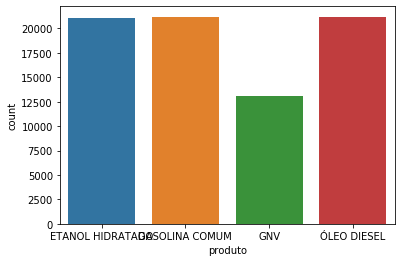

In [949]:
sns.countplot(base['produto'])

Determinaremos o número de vezes que cada região aparece na base.

In [950]:
contagem = base.loc[:,'regiao']
contagem.value_counts()

NORDESTE        26769
NORTE           16849
SUDESTE         12556
CENTRO OESTE    10943
SUL              9407
Name: regiao, dtype: int64

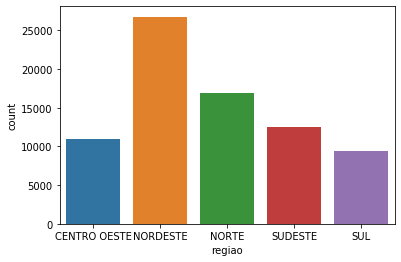

In [951]:
sns.countplot(base['regiao'])


Determinaremos o número de vezes que cada ano aparece na base.

In [952]:
contagem = base.loc[:,'ano']
contagem.value_counts()

2012    5185
2006    5167
2017    5128
2014    5124
2013    5117
2010    5085
2011    5083
2007    5071
2016    5065
2008    5049
2018    5019
2015    5017
2009    4883
2005    4840
2004    3287
2019    2404
Name: ano, dtype: int64

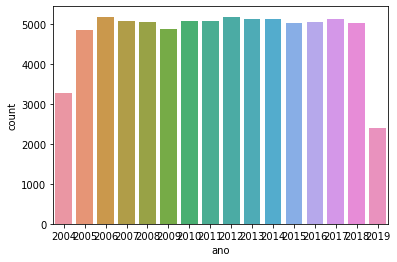

In [953]:
sns.countplot(base['ano'])

Com isso, conseguimos compreender que a base possuir muitos dados de 2013 até 2017, que poderia detectar fortes oscilações nesse periodo. Possui muitos dados do nordeste, e em relação ao sul, tem o triplo de aparições. Quanto aos combustiveis, o GLP e diesel s10 possuem poucas aparições em relações aos demais.

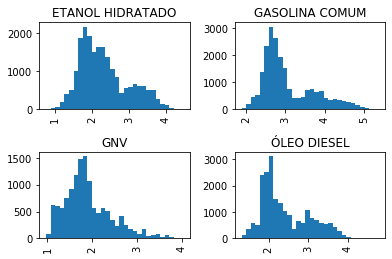

In [954]:
histograma_completo = base.hist(column="preco_medio",by=["produto"],bins=30)

Gerando o histograma acima, por preco de revenda e segmentado por produtos, a distribuição da gasolina nos salta aos olhos, seu histograma tem uma cauda longa a direita e um pico estreito próximo dos 2.8. Em contraponto o diesel s10 é praticamente um retangulo, remetendo que os preços são praticamente imutáveis, ou pouco mutavíes ao longo dos períodos.

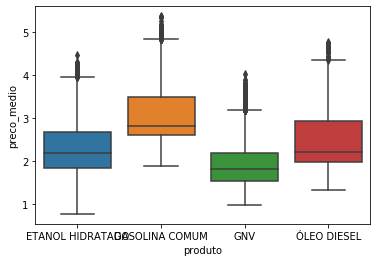

In [955]:
 sns.boxplot( x = "produto" ,  y="preco_medio" ,  data = base)

In [956]:
etanol = base[base.produto=='ETANOL HIDRATADO']
etanol=etanol.groupby(['ano','regiao'])['preco_medio'].mean().unstack(fill_value=0)
gasolina =base[base.produto=='GASOLINA COMUM']
gasolina=gasolina.groupby(['ano','regiao'])['preco_medio'].mean().unstack(fill_value=0)
gnv =base[base.produto=='GNV']
gnv=gnv.groupby(['ano','regiao'])['preco_medio'].mean().unstack(fill_value=0)
diesel =base[base.produto=='ÓLEO DIESEL']
diesel=diesel.groupby(['ano','regiao'])['preco_medio'].mean().unstack(fill_value=0)


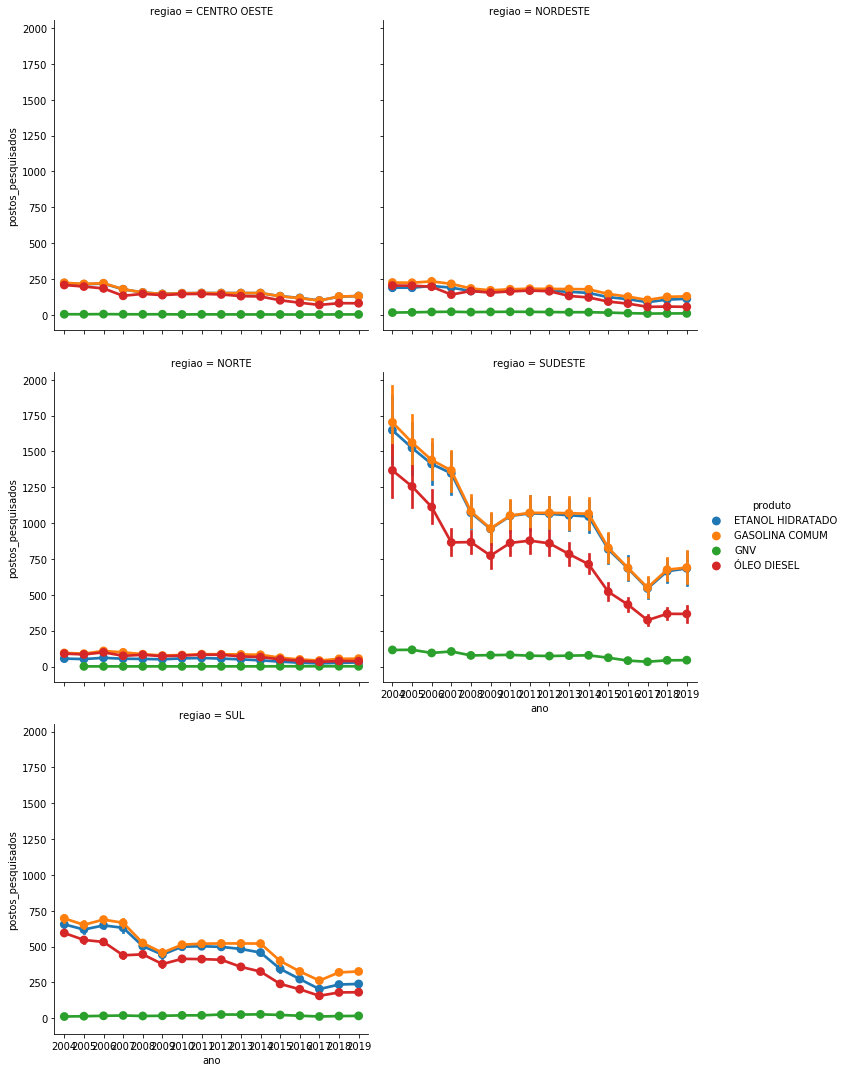

In [957]:
sns.catplot(x='ano',y='postos_pesquisados', col='regiao',hue ='produto',kind='point',col_wrap=2, aspect=1,data= base)


Para cada região e produto, temosque a relação de postos em média avaliados e produtos se mantem. Temos o pico de óleo diesel S10 em 2013, ano em que se populariou em todas as regições. Observamos também uma diminuição de postos observados no sudeste, mas ainda sim, muitos postoss. Não acreditamos que o número de postos afetará a análise.

## 5.1 Análises individuais

    Exploraremos cada variavél individualmente para entender seu comportamente ao longo do tempo. 
    Iniciaremos pelo etanol.

In [958]:
etanol.head(21)

regiao,CENTRO OESTE,NORDESTE,NORTE,SUDESTE,SUL
ano,,,,,
2004,1.502309,1.534441,1.736340,1.274912,1.396853
2005,1.630055,1.711411,1.900959,1.466315,1.611667
2006,1.880292,1.953212,2.171461,1.794656,1.880478
2007,1.597981,1.764425,1.949640,1.613649,1.638378
2008,1.634000,1.793338,1.988585,1.589534,1.628506
2009,1.647225,1.769771,1.969817,1.635170,1.669287
2010,1.786207,1.917887,2.145036,1.817034,1.863397
2011,2.053856,2.178803,2.334937,2.159428,2.226686
2012,2.068382,2.204065,2.375116,2.157764,2.243604


Podemos observar o crescente valor médio de alcool nas regiões

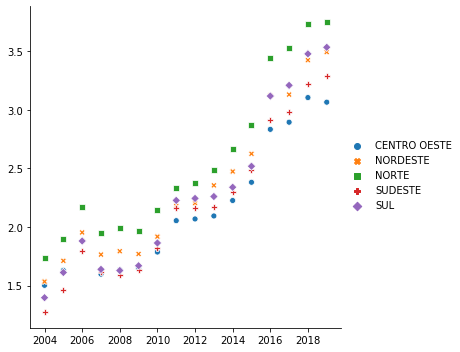

In [959]:
sns.relplot( data=etanol)

regiao
CENTRO OESTE    2.149757
NORDESTE        2.340337
NORTE           2.564776
SUDESTE         2.179050
SUL             2.288143
dtype: float64

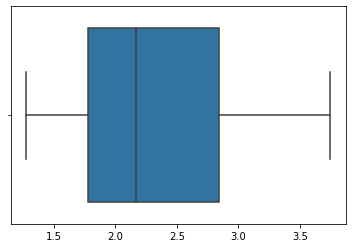

In [960]:
sns.boxplot(etanol)
etanol.mean()

Como observado no gráfico e confirmado pelas médias gerais, a região Norte é a que apresenta os maiores preços médios do etanol, seguido por nordeste, sul, sudeste e centro oeste. Porém ao analisarmos apenas o gráfico, veemos que a região sul, desde 2016 já estão com valoes maiores que a região nordeste em relação ao etanol.

In [961]:
sul = base[base.regiao=='SUL']
sul = sul[sul.produto=='ETANOL HIDRATADO']
inicio_sul_ano_0=sul[sul.ano==2004]
inicio_sul_ano_0 = inicio_sul_ano_0.preco_medio.max()
fim_sul = sul[sul.ano==2019]
fim_sul = fim_sul.preco_medio.max()
variacao_sul = (fim_sul-inicio_sul_ano_0)/fim_sul
print('O maior valor pago em etanol no Sul em 2004 foi de {0} \n'.format(inicio_sul_ano_0))
print('O maior valor pago em etanol no Sul em 2019 foi de {0}\n'.format(fim_sul))



nordeste = base[base.regiao=='NORDESTE']
nordeste=nordeste[nordeste.produto=='ETANOL HIDRATADO']
inicio_nordeste_ano_0=nordeste[nordeste.ano==2004]
inicio_nordeste_ano_0 = inicio_nordeste_ano_0.preco_medio.max()
fim_nordeste = nordeste[nordeste.ano==2019]
fim_nordeste = fim_nordeste.preco_medio.max()
variacao_nordeste = (fim_nordeste-inicio_nordeste_ano_0)/fim_nordeste
print('O maior valor pago em etanol no Nordeste em 2004 foi de {0} \n'.format(inicio_nordeste_ano_0))
print('O maior valor pago em etanol no Nordeste em 2019 foi de {0}\n'.format(fim_nordeste))



norte = base[base.regiao=='NORTE']
norte=norte[norte.produto=='ETANOL HIDRATADO']
inicio_norte_ano_0=norte[norte.ano==2004]
inicio_norte_ano_0 = inicio_norte_ano_0.preco_medio.max()
fim_norte = norte[norte.ano==2019]
fim_norte = fim_norte.preco_medio.max()
variacao_norte = (fim_norte-inicio_norte_ano_0)/fim_norte
print('O maior valor pago em etanol no Norte em 2004 foi de {0} \n'.format(inicio_norte_ano_0))
print('O maior valor pago em etanol no Norte em 2019 foi de {0}\n'.format(fim_norte))



sudeste = base[base.regiao=='SUDESTE']
sudeste=sudeste[sudeste.produto=='ETANOL HIDRATADO']
inicio_sudeste_ano_0=sudeste[sudeste.ano==2004]
inicio_sudeste_ano_0 = inicio_sudeste_ano_0.preco_medio.max()
fim_sudeste = sudeste[sudeste.ano==2019]
fim_sudeste = fim_sudeste.preco_medio.max()
variacao_sudeste = (fim_sudeste-inicio_sudeste_ano_0)/fim_sudeste
print('O maior valor pago em etanol no Sudeste em 2004 foi de {0} \n'.format(inicio_sudeste_ano_0))
print('O maior valor pago em etanol no Sudeste em 2019 foi de {0}\n'.format(fim_sudeste))



centroeste = base[base.regiao=='CENTRO OESTE']
centroeste=centroeste[centroeste.produto=='ETANOL HIDRATADO']
inicio_centroeste_ano_0=centroeste[centroeste.ano==2004]
inicio_centroeste_ano_0 = inicio_centroeste_ano_0.preco_medio.max()
fim_centroeste = centroeste[centroeste.ano==2019]
fim_centroeste = fim_centroeste.preco_medio.max()
variacao_centroeste = (fim_centroeste-inicio_centroeste_ano_0)/fim_centroeste

variacao_sul_etanol =variacao_sul
variacao_sudeste_etanol =variacao_sudeste
variacao_norte_etanol =variacao_norte
variacao_nordeste_etanol =variacao_nordeste
variacao_centroeste_etanol =variacao_centroeste

print('O maior valor pago em etanol no Centro Oeste em 2004 foi de {0} \n'.format(inicio_centroeste_ano_0))
print('O maior valor pago em etanol no Centro Oeste em 2019 foi de {0}\n'.format(fim_centroeste))

                                                                                           
print('A variação de valor do etanol no Sul foi de {}% em 15 anos\n'.format(round((variacao_sul*100),2)))                                                                                         
                                                                                           
print('A variação de valor do etanol no Nordste foi de {}% em 15 anos\n'.format(round((variacao_nordeste*100),2)))                                                                                           
print('A variação de valor do etanol no Norte foi de {}% em 15 anos\n'.format(round((variacao_norte*100),2)))                                                                                          
print('A variação de valor do etanol no Sudeste foi de {}% em 15 anos\n'.format(round((variacao_sudeste*100),2)))            
print('A variação de valor do etanol no Centro Oeste foi de {}% em 15 anos\n'.format(round((variacao_centroeste*100) ,2)))

aumento_etanol_sudeste =fim_sudeste-inicio_sudeste_ano_0
aumento_etanol_sul =fim_sul-inicio_sul_ano_0
aumento_etanol_norte =fim_norte-inicio_norte_ano_0
aumento_etanol_nordeste =fim_nordeste-inicio_sul_ano_0
aumento_etanol_centroeste =fim_centroeste-inicio_sul_ano_0

O maior valor pago em etanol no Sul em 2004 foi de 1.818 

O maior valor pago em etanol no Sul em 2019 foi de 4.287

O maior valor pago em etanol no Nordeste em 2004 foi de 1.993 

O maior valor pago em etanol no Nordeste em 2019 foi de 3.927

O maior valor pago em etanol no Norte em 2004 foi de 2.154 

O maior valor pago em etanol no Norte em 2019 foi de 4.032

O maior valor pago em etanol no Sudeste em 2004 foi de 1.639 

O maior valor pago em etanol no Sudeste em 2019 foi de 4.115

O maior valor pago em etanol no Centro Oeste em 2004 foi de 1.853 

O maior valor pago em etanol no Centro Oeste em 2019 foi de 3.5980000000000003

A variação de valor do etanol no Sul foi de 57.59% em 15 anos

A variação de valor do etanol no Nordste foi de 49.25% em 15 anos

A variação de valor do etanol no Norte foi de 46.58% em 15 anos

A variação de valor do etanol no Sudeste foi de 60.17% em 15 anos

A variação de valor do etanol no Centro Oeste foi de 48.5% em 15 anos



    O maior aumento de preço de etanol deu-se na região Sudeste. Um aumento de praticamente 60% do valor nos últimos 15 anos.
    Seguiremos a análise, agora para a gasolina.

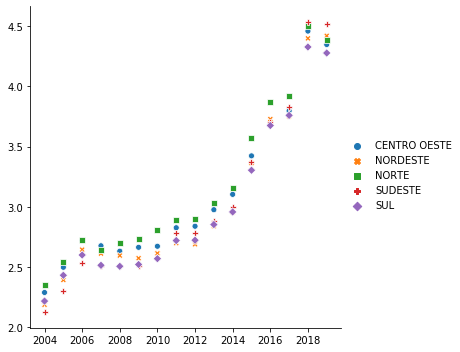

In [962]:
sns.relplot( data=gasolina)

regiao
CENTRO OESTE    3.100107
NORDESTE        3.028522
NORTE           3.169788
SUDESTE         3.028352
SUL             2.996897
dtype: float64

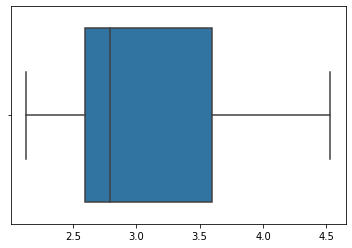

In [963]:
sns.boxplot(gasolina)
gasolina.mean()

    Pelo boxplot, temos uma causa a direita grande, representando grandes oscilações de preço. Quando checamos a média por região, podemos á observar isso, com a região norte pagando em média praticamente R$3.17 enquanto o sul pagava em média R$3

In [964]:
sul = base[base.regiao=='SUL']
sul = sul[sul.produto=='GASOLINA COMUM']
inicio_sul_ano_0=sul[sul.ano==2004]
inicio_sul_ano_0 = inicio_sul_ano_0.preco_medio.max()
fim_sul = sul[sul.ano==2019]
fim_sul = fim_sul.preco_medio.max()
variacao_sul = (fim_sul-inicio_sul_ano_0)/fim_sul
print('O maior valor pago em gasolina no Sul em 2004 foi de {0} \n'.format(inicio_sul_ano_0))
print('O maior valor pago em gasolina no Sul em 2019 foi de {0}\n'.format(fim_sul))



nordeste = base[base.regiao=='NORDESTE']
nordeste=nordeste[nordeste.produto=='GASOLINA COMUM']
inicio_nordeste_ano_0=nordeste[nordeste.ano==2004]
inicio_nordeste_ano_0 = inicio_nordeste_ano_0.preco_medio.max()
fim_nordeste = nordeste[nordeste.ano==2019]
fim_nordeste = fim_nordeste.preco_medio.max()
variacao_nordeste = (fim_nordeste-inicio_nordeste_ano_0)/fim_nordeste
print('O maior valor pago em gasolina no Nordeste em 2004 foi de {0} \n'.format(inicio_nordeste_ano_0))
print('O maior valor pago em gasolina no Nordeste em 2019 foi de {0}\n'.format(fim_nordeste))



norte = base[base.regiao=='NORTE']
norte=norte[norte.produto=='GASOLINA COMUM']
inicio_norte_ano_0=norte[norte.ano==2004]
inicio_norte_ano_0 = inicio_norte_ano_0.preco_medio.max()
fim_norte = norte[norte.ano==2019]
fim_norte = fim_norte.preco_medio.max()
variacao_norte = (fim_norte-inicio_norte_ano_0)/fim_norte
print('O maior valor pago em gasolina no Norte em 2004 foi de {0} \n'.format(inicio_norte_ano_0))
print('O maior valor pago em gasolina no Norte em 2019 foi de {0}\n'.format(fim_norte))



sudeste = base[base.regiao=='SUDESTE']
sudeste=sudeste[sudeste.produto=='GASOLINA COMUM']
inicio_sudeste_ano_0=sudeste[sudeste.ano==2004]
inicio_sudeste_ano_0 = inicio_sudeste_ano_0.preco_medio.max()
fim_sudeste = sudeste[sudeste.ano==2019]
fim_sudeste = fim_sudeste.preco_medio.max()
variacao_sudeste = (fim_sudeste-inicio_sudeste_ano_0)/fim_sudeste
print('O maior valor pago em gasolina no Sudeste em 2004 foi de {0} \n'.format(inicio_sudeste_ano_0))
print('O maior valor pago em gasolina no Sudeste em 2019 foi de {0}\n'.format(fim_sudeste))



centroeste = base[base.regiao=='CENTRO OESTE']
centroeste=centroeste[centroeste.produto=='GASOLINA COMUM']
inicio_centroeste_ano_0=centroeste[centroeste.ano==2004]
inicio_centroeste_ano_0 = inicio_centroeste_ano_0.preco_medio.max()
fim_centroeste = centroeste[centroeste.ano==2019]
fim_centroeste = fim_centroeste.preco_medio.max()
variacao_centroeste = (fim_centroeste-inicio_centroeste_ano_0)/fim_centroeste
print('O maior valor pago em gasolina no Centro Oeste em 2004 foi de {0} \n'.format(inicio_centroeste_ano_0))
print('O maior valor pago em gasolina no Centro Oeste em 2019 foi de {0}\n'.format(fim_centroeste))

                                                                                           
print('A variação de valor do gasolinano Sul foi de {}% em 15 anos\n'.format(round((variacao_sul*100),2)))                                                                                         
                                                                                           
print('A variação de valor do gasolina no Nordste foi de {}% em 15 anos\n'.format(round((variacao_nordeste*100),2)))                                                                                           
print('A variação de valor do gasolina no Norte foi de {}% em 15 anos\n'.format(round((variacao_norte*100),2)))                                                                                          
print('A variação de valor do gasolina no Sudeste foi de {}% em 15 anos\n'.format(round((variacao_sudeste*100),2)))            
print('A variação de valor do gasolina no Centro Oeste foi de {}% em 15 anos\n'.format(round((variacao_centroeste*100) ,2)))
                                                                                                       
aumento_gasolina_sudeste =fim_sudeste-inicio_sudeste_ano_0
aumento_gasolina_sul =fim_sul-inicio_sul_ano_0
aumento_gasolina_norte =fim_norte-inicio_norte_ano_0
aumento_gasolina_nordeste =fim_nordeste-inicio_sul_ano_0
aumento_gasolina_centroeste =fim_centroeste-inicio_sul_ano_0


variacao_sul_gasolina =variacao_sul
variacao_sudeste_gasolina =variacao_sudeste
variacao_norte_gasolina =variacao_norte
variacao_nordeste_gasolina =variacao_nordeste
variacao_centroeste_gasolina =variacao_centroeste

O maior valor pago em gasolina no Sul em 2004 foi de 2.486 

O maior valor pago em gasolina no Sul em 2019 foi de 4.8180000000000005

O maior valor pago em gasolina no Nordeste em 2004 foi de 2.457 

O maior valor pago em gasolina no Nordeste em 2019 foi de 4.9510000000000005

O maior valor pago em gasolina no Norte em 2004 foi de 2.639 

O maior valor pago em gasolina no Norte em 2019 foi de 5.121

O maior valor pago em gasolina no Sudeste em 2004 foi de 2.316 

O maior valor pago em gasolina no Sudeste em 2019 foi de 5.044

O maior valor pago em gasolina no Centro Oeste em 2004 foi de 2.707 

O maior valor pago em gasolina no Centro Oeste em 2019 foi de 4.763

A variação de valor do gasolinano Sul foi de 48.4% em 15 anos

A variação de valor do gasolina no Nordste foi de 50.37% em 15 anos

A variação de valor do gasolina no Norte foi de 48.47% em 15 anos

A variação de valor do gasolina no Sudeste foi de 54.08% em 15 anos

A variação de valor do gasolina no Centro Oeste foi de 43.17%

    A região sudeste, apresentou as maiores oscilações do preço da gasolina nos últimos 15 anos, um aumento de 50% do valor. Chegando a pagar R$5,04.
    A próxima análise será em GNV.

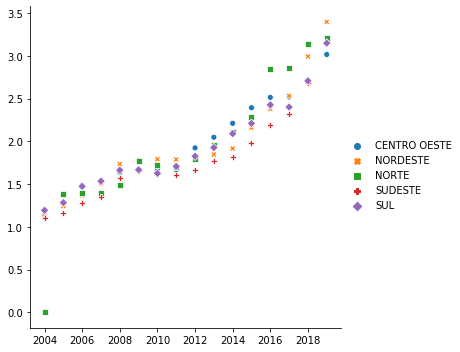

In [965]:
sns.relplot( data=gnv)

regiao
CENTRO OESTE    1.970008
NORDESTE        1.961928
NORTE           1.942218
SUDESTE         1.808258
SUL             1.930748
dtype: float64

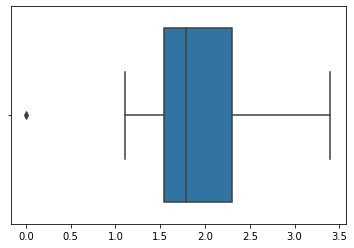

In [966]:
sns.boxplot(gnv)
gnv.mean()

    Observa-se que em média os dados estão mais condensados e próximos a média.

In [967]:
sul = base[base.regiao=='SUL']
sul = sul[sul.produto=='GNV']
inicio_sul_ano_0=sul[sul.ano==2004]
inicio_sul_ano_0 = inicio_sul_ano_0.preco_medio.max()
fim_sul = sul[sul.ano==2019]
fim_sul = fim_sul.preco_medio.max()
variacao_sul = (fim_sul-inicio_sul_ano_0)/fim_sul
print('O maior valor pago em GNV no Sul em 2004 foi de {0} \n'.format(inicio_sul_ano_0))
print('O maior valor pago em GNV no Sul em 2019 foi de {0}\n'.format(fim_sul))



nordeste = base[base.regiao=='NORDESTE']
nordeste=nordeste[nordeste.produto=='GNV']
inicio_nordeste_ano_0=nordeste[nordeste.ano==2004]
inicio_nordeste_ano_0 = inicio_nordeste_ano_0.preco_medio.max()
fim_nordeste = nordeste[nordeste.ano==2019]
fim_nordeste = fim_nordeste.preco_medio.max()
variacao_nordeste = (fim_nordeste-inicio_nordeste_ano_0)/fim_nordeste
print('O maior valor pago em GNV no NordestE em 2004 foi de {0} \n'.format(inicio_nordeste_ano_0))
print('O maior valor pago em GNV no Nordeste em 2019 foi de {0}\n'.format(fim_nordeste))



norte = base[base.regiao=='NORTE']
norte=norte[norte.produto=='GNV']
inicio_norte_ano_0=norte[norte.ano==2005]
inicio_norte_ano_0 = inicio_norte_ano_0.preco_medio.max()
fim_norte = norte[norte.ano==2019]
fim_norte = fim_norte.preco_medio.max()
variacao_norte = (fim_norte-inicio_norte_ano_0)/fim_norte
print('O maior valor pago em GNV no Norte em 2004 foi de {0} \n'.format(inicio_norte_ano_0))
print('O maior valor pago em GNV no Norte em 2019 foi de {0}\n'.format(fim_norte))



sudeste = base[base.regiao=='SUDESTE']
sudeste=sudeste[sudeste.produto=='GNV']
inicio_sudeste_ano_0=sudeste[sudeste.ano==2004]
inicio_sudeste_ano_0 = inicio_sudeste_ano_0.preco_medio.max()
fim_sudeste = sudeste[sudeste.ano==2019]
fim_sudeste = fim_sudeste.preco_medio.max()
variacao_sudeste = (fim_sudeste-inicio_sudeste_ano_0)/fim_sudeste
print('O maior valor pago em GNV no Sudeste em 2004 foi de {0} \n'.format(inicio_sudeste_ano_0))
print('O maior valor pago em GNV no Sudeste em 2019 foi de {0}\n'.format(fim_sudeste))



centroeste = base[base.regiao=='CENTRO OESTE']
centroeste=centroeste[centroeste.produto=='GNV']
inicio_centroeste_ano_0=centroeste[centroeste.ano==2004]
inicio_centroeste_ano_0 = inicio_centroeste_ano_0.preco_medio.max()
fim_centroeste = centroeste[centroeste.ano==2019]
fim_centroeste = fim_centroeste.preco_medio.max()
variacao_centroeste = (fim_centroeste-inicio_centroeste_ano_0)/fim_centroeste
print('O maior valor pago em GNV no Centro Oeste em 2004 foi de {0} \n'.format(inicio_centroeste_ano_0))
print('O maior valor pago em GNV no Centro Oeste em 2019 foi de {0}\n'.format(fim_centroeste))

                                                                                           
print('A variação de valor do GNV Sul foi de {}% em 15 anos\n'.format(round((variacao_sul*100),2)))                                                                                         
                                                                                           
print('A variação de valor do GNV no Nordste foi de {}% em 15 anos\n'.format(round((variacao_nordeste*100),2)))                                                                                           
print('A variação de valor do GNV no Norte foi de {}% em 15 anos\n'.format(round((variacao_norte*100),2)))                                                                                          
print('A variação de valor do GNV no Sudeste foi de {}% em 15 anos\n'.format(round((variacao_sudeste*100),2)))            
print('A variação de valor do GNV no Centro Oeste foi de {}% em 15 anos\n'.format(round((variacao_centroeste*100) ,2)))
                                                                                                       
aumento_gnv_sudeste =fim_sudeste-inicio_sudeste_ano_0
aumento_gnv_sul =fim_sul-inicio_sul_ano_0
aumento_gnv_norte =fim_norte-inicio_norte_ano_0
aumento_gnv_nordeste =fim_nordeste-inicio_sul_ano_0
aumento_gnv_centroeste =fim_centroeste-inicio_sul_ano_0


variacao_sul_gnv =variacao_sul
variacao_sudeste_gnv =variacao_sudeste
variacao_norte_gnv =variacao_norte
variacao_nordeste_gnv =variacao_nordeste
variacao_centroeste_gnv =variacao_centroeste

O maior valor pago em GNV no Sul em 2004 foi de 1.199 

O maior valor pago em GNV no Sul em 2019 foi de 3.499

O maior valor pago em GNV no NordestE em 2004 foi de 1.399 

O maior valor pago em GNV no Nordeste em 2019 foi de 3.811

O maior valor pago em GNV no Norte em 2004 foi de 1.399 

O maior valor pago em GNV no Norte em 2019 foi de 3.499

O maior valor pago em GNV no Sudeste em 2004 foi de 1.161 

O maior valor pago em GNV no Sudeste em 2019 foi de 3.594

O maior valor pago em GNV no Centro Oeste em 2004 foi de 1.169 

O maior valor pago em GNV no Centro Oeste em 2019 foi de 3.889

A variação de valor do GNV Sul foi de 65.73% em 15 anos

A variação de valor do GNV no Nordste foi de 63.29% em 15 anos

A variação de valor do GNV no Norte foi de 60.02% em 15 anos

A variação de valor do GNV no Sudeste foi de 67.7% em 15 anos

A variação de valor do GNV no Centro Oeste foi de 69.94% em 15 anos



    O maior aumento percentual foi no centro-oeste para o GNV.
    Seguiremos com o diesel.

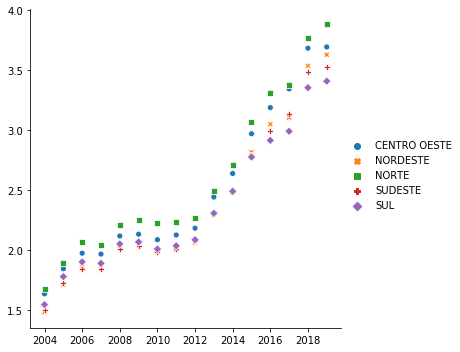

In [968]:
sns.relplot( data=diesel)

regiao
CENTRO OESTE    2.500685
NORDESTE        2.368723
NORTE           2.591250
SUDESTE         2.358254
SUL             2.349283
dtype: float64

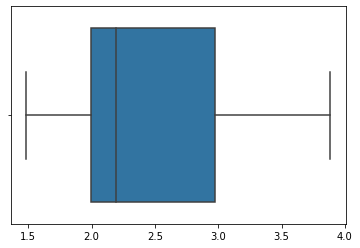

In [969]:
sns.boxplot(diesel)
diesel.mean()

    A média de valor é baixa, porém apresenta uma grande variação

In [970]:
sul = base[base.regiao=='SUL']
sul = sul[sul.produto=='ÓLEO DIESEL']
inicio_sul_ano_0=sul[sul.ano==2004]
inicio_sul_ano_0 = inicio_sul_ano_0.preco_medio.max()
fim_sul = sul[sul.ano==2019]
fim_sul = fim_sul.preco_medio.max()
variacao_sul = (fim_sul-inicio_sul_ano_0)/fim_sul
print('O maior valor pago em diesel no Sul em 2004 foi de {0} \n'.format(inicio_sul_ano_0))
print('O maior valor pago em diesel no Sul em 2019 foi de {0}\n'.format(fim_sul))



nordeste = base[base.regiao=='NORDESTE']
nordeste=nordeste[nordeste.produto=='ÓLEO DIESEL']
inicio_nordeste_ano_0=nordeste[nordeste.ano==2004]
inicio_nordeste_ano_0 = inicio_nordeste_ano_0.preco_medio.max()
fim_nordeste = nordeste[nordeste.ano==2019]
fim_nordeste = fim_nordeste.preco_medio.max()
variacao_nordeste = (fim_nordeste-inicio_nordeste_ano_0)/fim_nordeste
print('O maior valor pago em disel no NordestE em 2004 foi de {0} \n'.format(inicio_nordeste_ano_0))
print('O maior valor pago em diesel no Nordeste em 2019 foi de {0}\n'.format(fim_nordeste))



norte = base[base.regiao=='NORTE']
norte=norte[norte.produto=='ÓLEO DIESEL']
inicio_norte_ano_0=norte[norte.ano==2004]
inicio_norte_ano_0 = inicio_norte_ano_0.preco_medio.max()
fim_norte = norte[norte.ano==2019]
fim_norte = fim_norte.preco_medio.max()
variacao_norte = (fim_norte-inicio_norte_ano_0)/fim_norte
print('O maior valor pago em diesel no Norte em 2004 foi de {0} \n'.format(inicio_norte_ano_0))
print('O maior valor pago em diesel no Norte em 2019 foi de {0}\n'.format(fim_norte))



sudeste = base[base.regiao=='SUDESTE']
sudeste=sudeste[sudeste.produto=='ÓLEO DIESEL']
inicio_sudeste_ano_0=sudeste[sudeste.ano==2004]
inicio_sudeste_ano_0 = inicio_sudeste_ano_0.preco_medio.max()
fim_sudeste = sudeste[sudeste.ano==2019]
fim_sudeste = fim_sudeste.preco_medio.max()
variacao_sudeste = (fim_sudeste-inicio_sudeste_ano_0)/fim_sudeste
print('O maior valor pago em diesel no Sudeste em 2004 foi de {0} \n'.format(inicio_sudeste_ano_0))
print('O maior valor pago em diesel no Sudeste em 2019 foi de {0}\n'.format(fim_sudeste))



centroeste = base[base.regiao=='CENTRO OESTE']
centroeste=centroeste[centroeste.produto=='ÓLEO DIESEL']
inicio_centroeste_ano_0=centroeste[centroeste.ano==2004]
inicio_centroeste_ano_0 = inicio_centroeste_ano_0.preco_medio.max()
fim_centroeste = centroeste[centroeste.ano==2019]
fim_centroeste = fim_centroeste.preco_medio.max()
variacao_centroeste = (fim_centroeste-inicio_centroeste_ano_0)/fim_centroeste
print('O maior valor pago em diesel no Centro Oeste em 2004 foi de {0} \n'.format(inicio_centroeste_ano_0))
print('O maior valor pago em diesel no Centro Oeste em 2019 foi de {0}\n'.format(fim_centroeste))

                                                                                           
print('A variação de valor do ÓLEO DIESEL Sul foi de {}% em 15 anos\n'.format(round((variacao_sul*100),2)))                                                                                         
                                                                                           
print('A variação de valor do ÓLEO DIESEL no Nordste foi de {}% em 15 anos\n'.format(round((variacao_nordeste*100),2)))                                                                                           
print('A variação de valor do ÓLEO DIESEL no Norte foi de {}% em 15 anos\n'.format(round((variacao_norte*100),2)))                                                                                          
print('A variação de valor do ÓLEO DIESEL no Sudeste foi de {}% em 15 anos\n'.format(round((variacao_sudeste*100),2)))            
print('A variação de valor do ÓLEO DIESEL no Centro Oeste foi de {}% em 15 anos\n'.format(round((variacao_centroeste*100) ,2)))
                                                                                                       
aumento_diesel_sudeste =fim_sudeste-inicio_sudeste_ano_0
aumento_diesel_sul =fim_sul-inicio_sul_ano_0
aumento_diesel_norte =fim_norte-inicio_norte_ano_0
aumento_diesel_nordeste =fim_nordeste-inicio_sul_ano_0
aumento_diesel_centroeste =fim_centroeste-inicio_sul_ano_0

variacao_sul_diesel =variacao_sul
variacao_sudeste_diesel =variacao_sudeste
variacao_norte_diesel =variacao_norte
variacao_nordeste_diesel =variacao_nordeste
variacao_centroeste_diesel =variacao_centroeste

O maior valor pago em diesel no Sul em 2004 foi de 1.794 

O maior valor pago em diesel no Sul em 2019 foi de 3.576

O maior valor pago em disel no NordestE em 2004 foi de 1.6840000000000002 

O maior valor pago em diesel no Nordeste em 2019 foi de 3.885

O maior valor pago em diesel no Norte em 2004 foi de 1.98 

O maior valor pago em diesel no Norte em 2019 foi de 4.729

O maior valor pago em diesel no Sudeste em 2004 foi de 1.703 

O maior valor pago em diesel no Sudeste em 2019 foi de 3.708

O maior valor pago em diesel no Centro Oeste em 2004 foi de 1.923 

O maior valor pago em diesel no Centro Oeste em 2019 foi de 4.0

A variação de valor do ÓLEO DIESEL Sul foi de 49.83% em 15 anos

A variação de valor do ÓLEO DIESEL no Nordste foi de 56.65% em 15 anos

A variação de valor do ÓLEO DIESEL no Norte foi de 58.13% em 15 anos

A variação de valor do ÓLEO DIESEL no Sudeste foi de 54.07% em 15 anos

A variação de valor do ÓLEO DIESEL no Centro Oeste foi de 51.92% em 15 anos



In [971]:
     print('A maior variação observada para óleo diesel foi no Norte, com 58% de aumento, ou R$ {}'.format(aumento_diesel_norte))
    

A maior variação observada para óleo diesel foi no Norte, com 58% de aumento, ou R$ 2.749


# 6. Conclusões

Ponto de atenção, não haviam dados relativos a GNV no norte em 2004, por esse motivo utilizamos o ano de 2005 como ano 0, e relevaremos o número.

In [972]:
print('A gasolina variou no Norte, com {}% de aumento, ou R$ {}\n'.format(round(variacao_norte_gasolina*100,2),round(aumento_gasolina_norte,3)))
print('O etanol variou no Norte, com {}% de aumento, ou R$ {}\n'.format(round(variacao_norte_etanol*100,2),round(aumento_etanol_norte,3)))
print('O gnv variou no Norte, com {}% de aumento, ou R$ {}\n'.format(round(variacao_norte_gnv*100,2),round(aumento_gnv_norte,3)))
print('O diesel variou no Norte, com {}% de aumento, ou R$ {}\n'.format(round(variacao_norte_diesel*100,2),round(aumento_diesel_norte,3)))

A gasolina variou no Norte, com 48.47% de aumento, ou R$ 2.482

O etanol variou no Norte, com 46.58% de aumento, ou R$ 1.878

O gnv variou no Norte, com 60.02% de aumento, ou R$ 2.1

O diesel variou no Norte, com 58.13% de aumento, ou R$ 2.749



In [973]:
print('A gasolina variou no Nordeste, com {}% de aumento, ou R$ {}\n'.format(round(variacao_nordeste_gasolina*100,2),round(aumento_gasolina_nordeste,3)))
print('O etanol variou no Nordeste, com {}% de aumento, ou R$ {}\n'.format(round(variacao_nordeste_etanol*100,2),round(aumento_etanol_nordeste,3)))
print('O gnv variou no Nordeste, com {}% de aumento, ou R$ {}\n'.format(round(variacao_nordeste_gnv*100,2),round(aumento_gnv_nordeste,3)))
print('O diesel variou no Nordeste, com {}% de aumento, ou R$ {}\n'.format(round(variacao_nordeste_diesel*100,2),round(aumento_diesel_nordeste,3)))

A gasolina variou no Nordeste, com 50.37% de aumento, ou R$ 2.465

O etanol variou no Nordeste, com 49.25% de aumento, ou R$ 2.109

O gnv variou no Nordeste, com 63.29% de aumento, ou R$ 2.612

O diesel variou no Nordeste, com 56.65% de aumento, ou R$ 2.091



In [974]:
print('A gasolina variou no Sul, com {}% de aumento, ou R$ {}\n'.format(round(variacao_sul_gasolina*100,2),round(aumento_gasolina_sul,3)))
print('O etanol variou no Sul, com {}% de aumento, ou R$ {}\n'.format(round(variacao_sul_etanol*100,2),round(aumento_etanol_sul,3)))
print('O gnv variou no Sul, com {}% de aumento, ou R$ {}\n'.format(round(variacao_sul_gnv*100,2),round(aumento_gnv_sul,3)))
print('O diesel variou no Sul, com {}% de aumento, ou R$ {}\n'.format(round(variacao_sul_diesel*100,2),round(aumento_diesel_sul,3)))

A gasolina variou no Sul, com 48.4% de aumento, ou R$ 2.332

O etanol variou no Sul, com 57.59% de aumento, ou R$ 2.469

O gnv variou no Sul, com 65.73% de aumento, ou R$ 2.3

O diesel variou no Sul, com 49.83% de aumento, ou R$ 1.782



In [975]:
print('A gasolina variou no Sudeste, com {}% de aumento, ou R$ {}\n'.format(round(variacao_sudeste_gasolina*100,2),round(aumento_gasolina_sudeste,3)))
print('O etanol variou no Sudeste, com {}% de aumento, ou R$ {}\n'.format(round(variacao_sudeste_etanol*100,2),round(aumento_etanol_sudeste,3)))
print('O gnv variou no Sudeste, com {}% de aumento, ou R$ {}\n'.format(round(variacao_sudeste_gnv*100,2),round(aumento_gnv_sudeste,3)))
print('O diesel variou no Sudeste, com {}% de aumento, ou R$ {}\n'.format(round(variacao_sudeste_diesel*100,2),round(aumento_diesel_sudeste,3)))

A gasolina variou no Sudeste, com 54.08% de aumento, ou R$ 2.728

O etanol variou no Sudeste, com 60.17% de aumento, ou R$ 2.476

O gnv variou no Sudeste, com 67.7% de aumento, ou R$ 2.433

O diesel variou no Sudeste, com 54.07% de aumento, ou R$ 2.005



In [976]:
print('A gasolina variou no Centro Oeste, com {}% de aumento, ou R$ {}\n'.format(round(variacao_centroeste_gasolina*100,2),round(aumento_gasolina_centroeste,3)))
print('O etanol variou no Centro Oeste, com {}% de aumento, ou R$ {}\n'.format(round(variacao_centroeste_etanol*100,2),round(aumento_etanol_centroeste,3)))
print('O gnv variou no Centro Oeste, com {}% de aumento, ou R$ {}\n'.format(round(variacao_centroeste_gnv*100,2),round(aumento_gnv_centroeste,3)))
print('O diesel variou no Centro Oeste, com {}% de aumento, ou R$ {}\n'.format(round(variacao_centroeste_diesel*100,2),round(aumento_diesel_centroeste,3)))

A gasolina variou no Centro Oeste, com 43.17% de aumento, ou R$ 2.277

O etanol variou no Centro Oeste, com 48.5% de aumento, ou R$ 1.78

O gnv variou no Centro Oeste, com 69.94% de aumento, ou R$ 2.69

O diesel variou no Centro Oeste, com 51.92% de aumento, ou R$ 2.206



    O maior aumento detectado foi na região Centro Oeste com o GNV, um aumento de praticamente 70%. Analisando os gráficos de variação de preço, vemos que todos saltam entre 2015 e 2016, podemos atribuir a isso, a estabilidade politica vivida no Brasil naquele período, ano do impeachment do ex-presidente Michel Temer e depois as devidas medidas tomadas para a estabilidade econômica do pais.